In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import  cross_val_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [47]:
iris = load_iris()
X,y = iris.data, iris.target

# Feature Scaling

In [48]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cross validation for optimal k

In [50]:
k_range = range(1, 21) 
cv_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
optimal_k = k_range[np.argmax(cv_scores)]
print("Optimal K:", optimal_k)
print("Cross-validated Accuracy:", max(cv_scores))

Optimal K: 3
Cross-validated Accuracy: 0.9583333333333334


# Graph

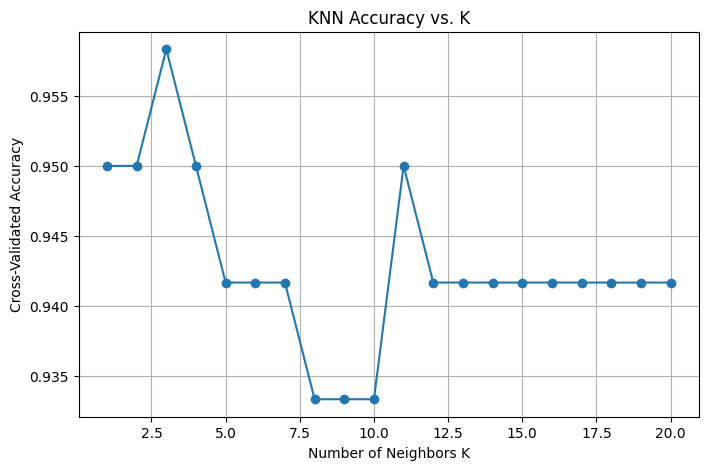

In [51]:
plt.figure(figsize=(8,5))
plt.plot(k_range, cv_scores, marker='o')
plt.xlabel("Number of Neighbors K")
plt.ylabel("Cross-Validated Accuracy")
plt.title("KNN Accuracy vs. K")
plt.grid(True)
plt.show()

In [ ]:
# k=3 , best balance btw bias ans variance for this dataset

In [53]:
# 1. Very Small K (K = 1,2): accuracy slightly lower than optimal due to overfitting
# 2. Moderate K (K = 5-7): Accuracy drops and start to uderfit the data
# 3. Large K (K = 7-10): Clear underfitting, Low variance but high bias
# 4. Very Large K (K = 11+): Accuracy stabilizes